Make and apply corrections for phi and amplitude

In [1]:
import importlib
import Mkids
import numpy as np
import matplotlib.pyplot as plt
from MkidsSoc import *
mkidsSoc = MkidsSoc(force_init_clks=False)

In [9]:
importlib.reload(Mkids)
mkids = Mkids.Mkids(mkidsSoc)
# Place the mixer so the output frequencies are centered on range of input frequencies
fMixer = mkids.fsIn/2
mkids.setFMixer(fMixer)
# Choose a tone frequency.  Find its output channel.
# Get three frequencies to center on three consecutive output channels.
fTone = fMixer + 50*mkids.fcOut
outCh = mkids.outFreq2ch(fTone)
fCenter = mkids.outCh2FreqCenter(outCh)
print("fCenter =",fCenter)
fMin = fCenter - 3.51*mkids.fcOut
fMax = fCenter + 3.5*mkids.fcOut
delay = 100.0
corr = mkids.makeCorrection(fMixer, fMin, fMax, delay, doProgress=True)

fCenter = 1124.0
0.5 2.0
streamLength = 1000


  0%|          | 0/100 [00:00<?, ?it/s]

46


In [38]:
corr['fMin'],fMin,corr['fMax']

(1116.98, 1116.98, 1131.0)

In [61]:
toneFreqs = np.array([fMin+6.3, fMin+2.1, fMax-3.2])
print(toneFreqs)
toneAmplitudes = np.ones(len(toneFreqs))*0.9/len(toneFreqs)
np.random.seed(12394321)
toneFis = 2* np.pi * np.random.uniform(size=len(toneFreqs))

bandwidth = 0.4*mkids.fcOut
nMeas = 50
nt = 1
mts = mkids.multiToneScan(toneFreqs, toneAmplitudes, toneFis, 
                    bandwidth, nMeas, fMixer, nt, verbose=False, doProgress=True)

[1123.28 1119.08 1127.8 ]


  0%|          | 0/50 [00:00<?, ?it/s]

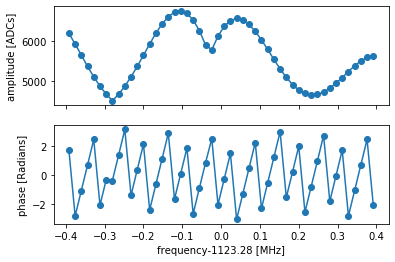

In [62]:
mkids.mtsPlot(mts,0)

In [63]:
importlib.reload(Mkids)
mkids = Mkids.Mkids(mkidsSoc)
mtsCorrected = mkids.applyCorrection(mts, corr, toneAmplitudes, verbose=False)

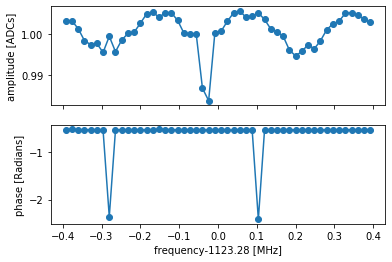

In [67]:
mkids.mtsPlot(mtsCorrected,0)